In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns

In [29]:
CSV_FILE = "plant_data.csv"
df = pd.read_csv(CSV_FILE, index_col=False)
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d_%H-%M-%S')

In [62]:
# Remove placeholder entries where values were -1
df = df[df["id"] != -1]

# Remove duplicates where center_x and center_y are same since it means the groups were merged
df = df.drop_duplicates(subset=["timestamp", "center_x", "center_y"], keep=False)

#
df = df[df["size"] > 1500]
df.head()

,timestamp,id,size,center_x,center_y
0,2022-03-02 19:09:25,0,20039,141.969360,149.129547
1,2022-03-02 19:09:25,1,13951,112.678159,405.017275
2,2022-03-02 19:09:25,2,16351,94.303040,585.606874
3,2022-03-02 19:09:25,3,13891,383.030811,355.254481
4,2022-03-02 19:09:25,4,21990,414.960982,137.167303


In [63]:
pivot_df = df.pivot(index='timestamp', columns='id', values='size')
pivot_df.head()

id,0,1,2,3,4,5
timestamp,,,,,,
2022-02-22 17:00:43,NaN,NaN,4253.0,2932.0,3577.0,2824.0
2022-02-22 17:16:09,NaN,NaN,3937.0,3156.0,3801.0,2821.0
2022-02-22 17:31:34,NaN,NaN,NaN,3012.0,NaN,2713.0
2022-02-22 17:47:00,NaN,NaN,3830.0,NaN,NaN,2883.0
2022-02-22 18:02:25,NaN,NaN,3827.0,3020.0,3648.0,2848.0


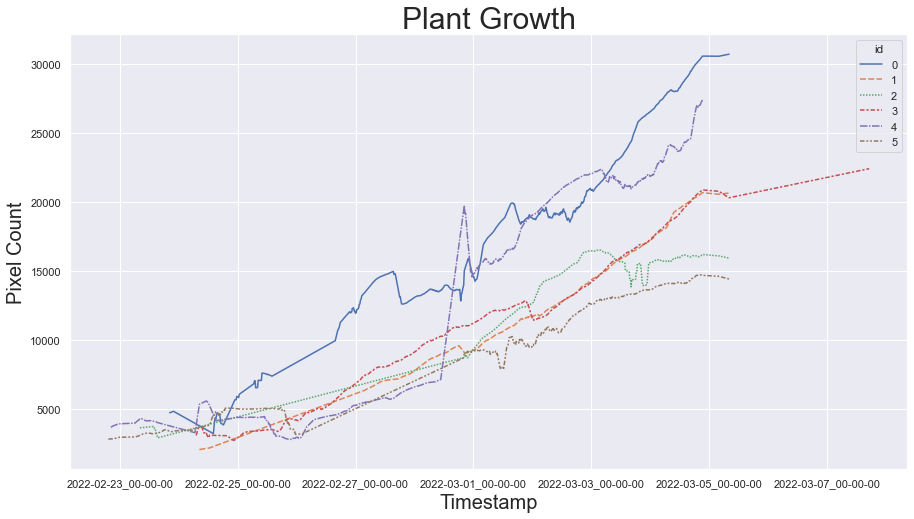

In [72]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(data=pivot_df.rolling(10).mean())# X axis format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d_%H-%M-%S'))
ax.set_xlabel("Timestamp", fontsize = 20)
ax.set_ylabel("Pixel Count", fontsize = 20)
ax.set_title("Plant Growth", fontsize = 30)

plt.show()